## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import scipy.stats as stats

In [3]:
antifungal = "Fluconazole"
molar_mass = 306.271
date = "2023-01-18"
organism = "Candida albicans"

## Import layout

In [4]:
#source_plate = '../growth_curve_files/plate.xlsx'
source_plate = r"design_dose_c-a.xlsx"
plate_df = pd.read_excel(source_plate, header=0, index_col=0)
plate_df.head(3)

,strain,conc
well,,
C0-1,pRs31-N-C-a-ERG11,0.0
C0-2,pRs31-N-C-a-ERG11,0.0
C0-3,pRs31-N-C-a-ERG11,0.0


In [5]:
#importation of excel output from the TECAN
source_table1 = r"od_FLZ_c-a_all.xlsx"
source_df = pd.read_excel(source_table1, header=0, index_col=0)
source_df.head()

,0s,900s,1800s,2700s,3601s,4501s,5401s,6301s,7201s,8101s,...,107114s,108014s,108914s,109814s,110715s,111615s,112515s,113415s,114315s,115215s
C0-1,0.14363,0.14458,0.14430,0.14400,0.14390,0.14387,0.14352,0.14350,0.14363,0.14395,...,1.1809,1.1806,1.1818,1.1837,1.1833,1.1845,1.1831,1.1835,1.1837,1.1837
C0-2,0.14360,0.14458,0.14438,0.14397,0.14393,0.14385,0.14355,0.14365,0.14370,0.14400,...,1.1809,1.1801,1.1839,1.1824,1.1837,1.1829,1.1828,1.1834,1.1847,1.1839
C0-3,0.14457,0.14608,0.14555,0.14540,0.14520,0.14513,0.14485,0.14482,0.14505,0.14552,...,1.1707,1.1706,1.1722,1.1740,1.1743,1.1739,1.1730,1.1731,1.1735,1.1745
C2-1,0.14305,0.14405,0.14375,0.14357,0.14343,0.14335,0.14308,0.14310,0.14325,0.14380,...,1.1738,1.1737,1.1746,1.1758,1.1767,1.1759,1.1758,1.1757,1.1756,1.1764
C2-2,0.14305,0.14402,0.14385,0.14353,0.14338,0.14335,0.14307,0.14307,0.14315,0.14363,...,1.1639,1.1632,1.1644,1.1652,1.1659,1.1658,1.1655,1.1652,1.1655,1.1662


In [6]:
#conversion of timepoints (s) -> (h)
rename_dict = {}

for col_name in source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
source_df.rename(columns = rename_dict, inplace=True)

source_df.head()

,0.000000,0.250000,0.500000,0.750000,1.000278,1.250278,1.500278,1.750278,2.000278,2.250278,...,29.753889,30.003889,30.253889,30.503889,30.754167,31.004167,31.254167,31.504167,31.754167,32.004167
C0-1,0.14363,0.14458,0.14430,0.14400,0.14390,0.14387,0.14352,0.14350,0.14363,0.14395,...,1.1809,1.1806,1.1818,1.1837,1.1833,1.1845,1.1831,1.1835,1.1837,1.1837
C0-2,0.14360,0.14458,0.14438,0.14397,0.14393,0.14385,0.14355,0.14365,0.14370,0.14400,...,1.1809,1.1801,1.1839,1.1824,1.1837,1.1829,1.1828,1.1834,1.1847,1.1839
C0-3,0.14457,0.14608,0.14555,0.14540,0.14520,0.14513,0.14485,0.14482,0.14505,0.14552,...,1.1707,1.1706,1.1722,1.1740,1.1743,1.1739,1.1730,1.1731,1.1735,1.1745
C2-1,0.14305,0.14405,0.14375,0.14357,0.14343,0.14335,0.14308,0.14310,0.14325,0.14380,...,1.1738,1.1737,1.1746,1.1758,1.1767,1.1759,1.1758,1.1757,1.1756,1.1764
C2-2,0.14305,0.14402,0.14385,0.14353,0.14338,0.14335,0.14307,0.14307,0.14315,0.14363,...,1.1639,1.1632,1.1644,1.1652,1.1659,1.1658,1.1655,1.1652,1.1655,1.1662


## Reshape (wide to long)

In [7]:
longdf = source_df.reset_index().rename(columns = {'index' : 'well'})
longdf = longdf.melt(id_vars = ['well'], var_name = 'time (h)', value_name = 'OD')
longdf

,well,time (h),OD
0,C0-1,0.0,0.14363
1,C0-2,0.0,0.14360
2,C0-3,0.0,0.14457
3,C2-1,0.0,0.14305
4,C2-2,0.0,0.14305
...,...,...,...
8509,C27-2,32.004167,0.19870
8510,C27-3,32.004167,0.19798
8511,C38-1,32.004167,0.18585
8512,C38-2,32.004167,0.18207


## Annotate dataframe with layout

In [8]:
merged_df = longdf.merge(right=plate_df, on=['well'])
merged_df.head(5)

,well,time (h),OD,strain,conc
0,C0-1,0.0,0.14363,pRs31-N-C-a-ERG11,0.0
1,C0-1,0.25,0.14458,pRs31-N-C-a-ERG11,0.0
2,C0-1,0.5,0.14430,pRs31-N-C-a-ERG11,0.0
3,C0-1,0.75,0.14400,pRs31-N-C-a-ERG11,0.0
4,C0-1,1.000278,0.14390,pRs31-N-C-a-ERG11,0.0


## Visualization (example)

C:\Users\CABED117\Anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\CABED117\Anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\CABED117\Anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\CABED117\Anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\CABED117\Anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecate

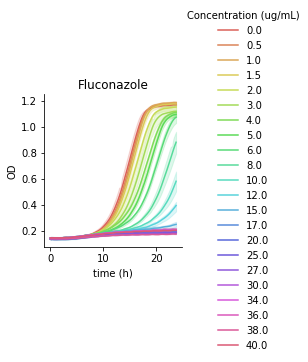

In [10]:
grid = sns.FacetGrid(data=merged_df[merged_df['time (h)'] <=24], hue='conc', palette='hls')
grid.map(sns.lineplot, 'time (h)', 'OD')
#grid.set_titles(col_template='{col_name}')
grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = 'Concentration (ug/mL)')
grid.fig.subplots_adjust(top=0.9)
plt.title('Fluconazole')
axes = grid.axes.flatten()
plt.savefig('GC_fluconazole_ca.png', format='png', dpi=300)
#plt.savefig('../growth_curve_files/graphs/mica_40h.png', format='png', dpi=300)

## Calculate area under the curve (AUC)

In [9]:
def get_auc(g):
    return np.trapz(g.OD)

In [10]:
aucdf = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_auc).reset_index(name='auc')
condensed_df = plate_df.merge(right=aucdf, on=['well'])
condensed_df.head(3)

,well,strain,conc,auc
0,C0-1,pRs31-N-C-a-ERG11,0.0,51.998525
1,C0-2,pRs31-N-C-a-ERG11,0.0,52.335270
2,C0-3,pRs31-N-C-a-ERG11,0.0,55.295525


## Calculate derivative growth rate (DGR)

In [11]:
def get_derivative_growth_rate(g):
    # rate is multiplied by 4 to convert from /15min (measurements every 15 min) to /h
    data_diff = g.OD.diff()*4
    get_top_5 = data_diff.nlargest(5)    
    growth_rate = np.median(get_top_5)
    return growth_rate

In [12]:
dgr = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_derivative_growth_rate).reset_index(name='dgr')
condensed_df = plate_df.merge(right=dgr, on=['well'])
condensed_df.head(3)

,well,strain,conc,dgr
0,C0-1,pRs31-N-C-a-ERG11,0.0,0.15700
1,C0-2,pRs31-N-C-a-ERG11,0.0,0.15320
2,C0-3,pRs31-N-C-a-ERG11,0.0,0.15288


## Convert concentrations (ug/mL -> uM)

In [13]:
def convert_to_uM(ug, mass_mol):
    # a simple function to convert ug/ml to uM with the molecular weigth of the compound
    vol = 0.001
    uM = (((ug*10**-6)/(vol*mass_mol))*10**6)
    return uM

In [14]:

condensed_df['concentration_uM'] = condensed_df['conc'].apply(lambda x: convert_to_uM(x, molar_mass))
condensed_df

,well,strain,conc,dgr,concentration_uM
0,C0-1,pRs31-N-C-a-ERG11,0.0,0.15700,0.000000
1,C0-2,pRs31-N-C-a-ERG11,0.0,0.15320,0.000000
2,C0-3,pRs31-N-C-a-ERG11,0.0,0.15288,0.000000
3,C0.5-1,pRs31-N-C-a-ERG11,0.5,0.16044,1.632541
4,C0.5-2,pRs31-N-C-a-ERG11,0.5,0.15272,1.632541
...,...,...,...,...,...
61,C38-2,pRs31-N-C-a-ERG11,38.0,0.00640,124.073125
62,C38-3,pRs31-N-C-a-ERG11,38.0,0.00708,124.073125
63,C40-1,pRs31-N-C-a-ERG11,40.0,0.00612,130.603289
64,C40-2,pRs31-N-C-a-ERG11,40.0,0.00724,130.603289


## Convert concentrations (uM -> ug/mL)

In [15]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

## Calculate inhibition coefficient

In [16]:
# Setting the value to be used to calculate the inhibition coefficient
# Either derivative growth rate (fitness_type = 'dgr')
# or normalized AUC parameter (fitness_type = 'norm_auc')
if 'dgr' in condensed_df.columns.tolist():
    fitness_type = 'dgr'
elif 'auc' in condensed_df.columns.tolist():
    fitness_type = 'norm_auc'
else:
    print('Fitness has not been calculated')

In [17]:
def get_inhib_coeff(df, fitness, fitness_type):
    # Inhibition coefficient is calculated either from the derivative growth rate (fitness_type = 'dgr')
    # or the normalized AUC parameter (fitness_type = 'norm_auc')
    ref = df.loc[(df.concentration_uM==0), 'dgr'].mean()
    return (ref - fitness)/ref

In [18]:
condensed_df['inhib_coeff'] = condensed_df['dgr'].apply(lambda x: get_inhib_coeff(condensed_df, x, 'dgr'))
condensed_df.head(3)

,well,strain,conc,dgr,concentration_uM,inhib_coeff
0,C0-1,pRs31-N-C-a-ERG11,0.0,0.15700,0.0,-0.017103
1,C0-2,pRs31-N-C-a-ERG11,0.0,0.15320,0.0,0.007515
2,C0-3,pRs31-N-C-a-ERG11,0.0,0.15288,0.0,0.009588


## Hill equation + fitting

In [19]:
#fit_data = condensed_df[(condensed_df.strain=='LL13-040') & (condensed_df.genotype=='WT') & (condensed_df.concentration_uM!=0) & (condensed_df.concentration_uM<50)][['concentration_uM','replicate','inhib_coeff']]
fit_data = condensed_df[(condensed_df.concentration_uM!=0)].groupby(['concentration_uM'])[['inhib_coeff']].mean().reset_index()
fit_data

,concentration_uM,inhib_coeff
0,1.632541,-0.019781
1,3.265082,-0.022372
2,4.897623,0.002505
3,6.530164,0.062365
4,9.795247,0.072126
5,13.060329,0.137255
6,16.325411,0.107282
7,19.590493,0.142869
8,26.120658,0.171115
9,32.650822,0.356051


In [20]:
wt_conc = fit_data.concentration_uM.values
wt_inhib = fit_data.inhib_coeff.values

In [21]:
print(wt_conc)
print(wt_inhib)

[  1.63254112   3.26508223   4.89762335   6.53016446   9.79524669
  13.06032892  16.32541116  19.59049339  26.12065785  32.65082231
  39.18098677  48.97623347  55.50639793  65.30164462  81.62705578
  88.15722024  97.95246693 111.01279586 117.54296032 124.07312478
 130.60328924]
[-0.0197806  -0.02237194  0.00250497  0.06236503  0.07212577  0.1372549
  0.10728168  0.14286948  0.17111514  0.35605079  0.68100544  0.92502375
  0.95499698  0.94964153  0.95473784  0.95171461  0.94895051  0.94990067
  0.94800035  0.95836573  0.95171461]


In [22]:
def hill_equation(x, E, n):
    # this function defines the hill equation, where:
    # x is the drug concentration
    # E is the concentration with half effect (IC50)
    # n is the hill coefficient,
    
    return 1/(1+((E/x)**n))

In [23]:
import scipy as sci

# Get best fit parameters (popt) and covariance matrix (pcov)
popt, pcov = sci.optimize.curve_fit(hill_equation, wt_conc, wt_inhib, p0=[30,4])
print(popt)
print(pcov)

[34.52740058  5.20743033]
[[1.01329615 0.06767438]
 [0.06767438 0.4935421 ]]


In [24]:
def get_IC(v, E, n):
    # This function calculates ICv based on IC50 (E) and hill coefficient (n) for any v value between 0 and 1
    return E*((v/(1-v))**(1/n))

In [25]:
ic50_mol = round(get_IC(0.5,popt[0],popt[1]),2)
#This value should be equal to popt[0]
print('IC50 = {} uM'.format(ic50))
ic75_mol = round(get_IC(0.75,popt[0],popt[1]),2)
print('IC75 = {} uM'.format(ic75))

NameError: name 'ic50' is not defined

In [26]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

In [27]:
ic50 = convert_to_ug(ic50_mol, molar_mass)
ic50

10.575537630000001

In [28]:
dof = np.size(wt_inhib) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)
ci_cy = tval*np.sqrt(pcov)[0]
# this little snippet of code allows to calculate the 95% confidence interval on both parameters.
# based on this, we would have IC50 = 9.26 uM +/- 1.18 and hill_coeff = 0.749 +/- 0.019

ci_cy

array([2.0997853 , 0.54264878])

In [29]:
interval = convert_to_ug(ci_cy[0], molar_mass)
interval

0.6431033426282641

In [30]:
# now we'll want to plot our curve on top of the data. However, since we'll be plotting on both linear and log
# axis, we need to choose x coordinates across our range of concentrations that are not log-distributed and not 
# linearly distributed
fit_vals = np.logspace(np.log2(wt_conc.min()),np.log2(wt_conc.max()), num=50, base=2)

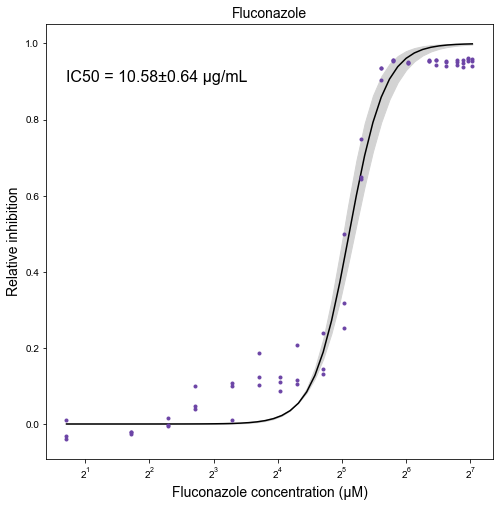

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(8,8))


plt.plot(condensed_df['concentration_uM'],condensed_df['inhib_coeff'], color='#6C44A6', 
         marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(fit_vals, [hill_equation(x,popt[0], popt[1]) for x in fit_vals], 'k')


plt.fill_between(fit_vals, [hill_equation(x,popt[0]+ci_cy[0], popt[1]-ci_cy[1]) for x in fit_vals],
                 [hill_equation(x,popt[0]-ci_cy[0], popt[1]+ci_cy[1]) for x in fit_vals], color='lightgrey')

plt.xscale('log',base=2)

text = "IC50 = " + str(round(ic50,2)) + "\u00B1" + str(round(interval,2)) +" μg/mL"
#text = "\nou " + str(round(ic50_mol,2)) + "\u00B1" + str(round(ci_cy[0],2)) + " $\mu$M\n" + "\nCoefficient de Hill = " + str(round(popt[1],2)) + "\u00B1" + str(round(ci_cy[1],2))+ "\n\nBasé sur le\ntaux de croissance dérivé\naprès 24h"
plt.text(wt_conc.min(), 0.9, text, fontsize=16) 

plt.xlabel(antifungal + " concentration (μM)", fontsize=14)
plt.ylabel('Relative inhibition', fontsize=14)
plt.title(antifungal, fontsize=14)

plt.rcParams['svg.fonttype'] = 'none'
name = "Dose-response_curve_" + antifungal + "_"+ organism + "24H" + "_" + date
plt.savefig(f"c:{name}.png", format='png', dpi=300)
plt.savefig(f"c:{name}.svg", format='svg', dpi=300)